## Notebook to explore data within the SADD (aircraft detection) dataset (JPG images, both YOLO v9 and COCO JSON annotation formats)

In [30]:
import os
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import glob

Because the original academic work as related to the GitHub page [here](https://github.com/hust-rslab/SAR-aircraft-data) utilized a YOLO format, this format is explored. The link provided directly on the GitHub page seemed troublesome, but within the "Issues" tab another GitHub user provided a separate Roboflow link which seemingly has the same dataset in various formats. From here the dataset was downloaded in both the YOLO v9 format, along with a COCO JSON format (as explored previously with HRSID). Dataset versions can be downloaded from [here](https://universe.roboflow.com/project-y2j81/hust-rslab-sar-aircraft-data/dataset/2). It should be noted that on top of the different formats, there are two overall versions for the dataset through Roboflow. For this notebook, v2 was utilized. About the v2 version, it should be noted that there are more images in the training set, less images in the validation set, and no images in the test set. Conversely, in the v1 version, there are less images in the training set, more images in the validation validation set, and 84 images in the test set. Once extracted, the v2 YOLO v9 format of the dataset is only 10.3 MB and the v2 COCO JSON format of the dataset is only 10.6 MB. For this notebook, I assume the following directory structure:
```
└───datasets
    └───SADD
        ├───hust-rslab-SAR-aircraft-data.v2i.yolov9
            ├───train
                ├───images
                └───labels
            ├───valid
                ├───images
                └───labels
            ├───data.yaml
            ├───README.dataset.txt
            └───README.roboflow.txt
        └───hust-rslab-SAR-aircraft-data.v2i.coco
            ├───train
                ├───...
                └───_annotations.coco.json
            ├───valid
                ├───...
                └───_annotations.coco.json
            ├───README.dataset.txt
            └───README.roboflow.txt
└───dataset_exploration
    └───SADD_exploration.ipynb
```

In [31]:
# Modify as needed
dataset_path_YOLOv9 = os.path.join(r"/home", "tjriz", "Documents", "Senior-Design", "datasets", "SADD", "hust-rslab-SAR-aircraft-data.v2i.yolov9")
dataset_path_COCOJSON = os.path.join(r"/home", "tjriz", "Documents", "Senior-Design", "datasets", "SADD", "hust-rslab-SAR-aircraft-data.v2i.coco")

In [32]:
train_images_YOLOv9_path = os.path.join(dataset_path_YOLOv9, "train", "images")
train_images_COCOJSON_path = os.path.join(dataset_path_COCOJSON, "train")
train_annotations_YOLOv9_path = os.path.join(dataset_path_YOLOv9, "train", "labels")
train_annotations_COCOJSON_path = os.path.join(train_images_COCOJSON_path, "_annotations.coco.json")

yaml_path = os.path.join(dataset_path_YOLOv9, "data.yaml")

In [33]:
# Inspecting data.yaml file associated with the YOLOv9 format. It should be again noted that this v2 version of the YOLO formatted dataset does not 
# have the test image directory which appeared to be present within the v1 version
with open(yaml_path, 'r') as file:
    yaml_data = file.read()

print(yaml_data)

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['0']

roboflow:
  workspace: project-y2j81
  project: hust-rslab-sar-aircraft-data
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/project-y2j81/hust-rslab-sar-aircraft-data/dataset/2


In [34]:
# Due to nature of YOLO v9 dataset structure, handling in a different way than JSON
# Generate two lists of files which match by index (image/annotations). Ensure that using the glob module in this way generalizes to other OS systems
image_YOLOv9_files = glob.glob(os.path.join(train_images_YOLOv9_path, '*.jpg'))
annotation_YOLOv9_files = glob.glob(os.path.join(train_annotations_YOLOv9_path, '*.txt'))
# Sorting by numerical prefix
image_YOLOv9_files.sort()
annotation_YOLOv9_files.sort()

# Just ensuring that everything matches index-wise
for i in range(4):
    print(f"The current image file is: {image_YOLOv9_files[i]}")
    print(f"The current annotation file is: {annotation_YOLOv9_files[i]}")

# Ensuring that the number of image files and annotation files line up
print("Number of image files: ", len(annotation_YOLOv9_files))
print("Number of annotation files: ", len(annotation_YOLOv9_files))

The current image file is: /home/tjriz/Documents/Senior-Design/datasets/SADD/hust-rslab-SAR-aircraft-data.v2i.yolov9/train/images/00021_bmp.rf.96c5ddb7699a8bdeb4ff6fe4257181bb.jpg
The current annotation file is: /home/tjriz/Documents/Senior-Design/datasets/SADD/hust-rslab-SAR-aircraft-data.v2i.yolov9/train/labels/00021_bmp.rf.96c5ddb7699a8bdeb4ff6fe4257181bb.txt
The current image file is: /home/tjriz/Documents/Senior-Design/datasets/SADD/hust-rslab-SAR-aircraft-data.v2i.yolov9/train/images/00022_bmp.rf.60928c8c115630c8a95fe63dde2d2e48.jpg
The current annotation file is: /home/tjriz/Documents/Senior-Design/datasets/SADD/hust-rslab-SAR-aircraft-data.v2i.yolov9/train/labels/00022_bmp.rf.60928c8c115630c8a95fe63dde2d2e48.txt
The current image file is: /home/tjriz/Documents/Senior-Design/datasets/SADD/hust-rslab-SAR-aircraft-data.v2i.yolov9/train/images/00023_bmp.rf.a02ccd1cc2ab671da1d062912662ed9d.jpg
The current annotation file is: /home/tjriz/Documents/Senior-Design/datasets/SADD/hust-rsl

In [35]:
# Reading two random example images. Can play around with changing the indices here to ensure consistency across various images from 
# 0 to 732 indices.
# This cell is dedicated to YOLOv9 data format
idx_ex1 = 10
idx_ex2 = 455
image_1 = plt.imread(image_YOLOv9_files[idx_ex1])
image_2 = plt.imread(image_YOLOv9_files[idx_ex2])
# Retrieving corresponding annotation files
anno_file1 = annotation_YOLOv9_files[idx_ex1]
anno_file2 = annotation_YOLOv9_files[idx_ex2]

annotations_1 = []
annotations_2 = []

# Reading annotation data into a list for later use while also printing to visualize the structure of the data. As also shown on the GitHub page,
# this type of annotation data is of a more simplistic/bare-bones format, and should be suitable for the purposes of the airplane detection for which
# this dataset was created. Only bounding boxes, with object classes (all of which are 0 for airplanes)
with open(anno_file1, 'r') as file:
    print("Contents of first example YOLOv9 annotations file:")
    for line in file:
        print(line)
        values = line.strip().split()
        class_id = int(values[0])
        x_center, y_center, width, height = map(float, values[1:])
        annotations_1.append([class_id, x_center, y_center, width, height])
print()
with open(anno_file2, 'r') as file:
    print("Contents of second example YOLOv9 annotations file:")
    for line in file:
        print(line)
        values = line.strip().split()
        class_id = int(values[0])
        x_center, y_center, width, height = map(float, values[1:])
        annotations_2.append([class_id, x_center, y_center, width, height])

Contents of first example YOLOv9 annotations file:
0 0.14955357142857142 0.12946428571428573 0.12053571428571429 0.16071428571428573

0 0.4955357142857143 0.12946428571428573 0.14285714285714285 0.16071428571428573

0 0.671875 0.12053571428571429 0.12053571428571429 0.16071428571428573

0 0.8415178571428571 0.12053571428571429 0.11160714285714286 0.16964285714285715

0 0.16517857142857142 0.515625 0.13392857142857142 0.15625

0 0.32142857142857145 0.5133928571428571 0.13392857142857142 0.16071428571428573

0 0.5 0.5089285714285714 0.125 0.15178571428571427

0 0.6629464285714286 0.5089285714285714 0.13839285714285715 0.16071428571428573

0 0.8348214285714286 0.5111607142857143 0.13392857142857142 0.15625

0 0.9308035714285714 0.640625 0.12053571428571429 0.15625

Contents of second example YOLOv9 annotations file:
0 0.8325892857142857 0.06473214285714286 0.17410714285714285 0.12946428571428573


In [36]:
# Reading the COCO JSON data annotation file
with open(train_annotations_COCOJSON_path) as json_data:
    data_train_JSON = json.load(json_data)
    image_info_JSON = data_train_JSON['images']
    image_annotations_JSON = data_train_JSON['annotations']

In [37]:
# Ensuring that both formats contain the same number of images and the same number of total annotations

print("Number of images in COCO JSON:", len(image_info_JSON))
print("Number of annotations in COCO JSON:", len(image_annotations_JSON))

# Counting the number of YOLOv9 annotations
total_anno_YOLO = 0
for annotation_path in annotation_YOLOv9_files:
    # Open each annotation file and count the lines
    with open(annotation_path, 'r') as file:
        annotations = file.readlines()
        total_anno_YOLO += len(annotations)
print()        
print("Number of images in YOLOv9:", len(annotation_YOLOv9_files))
print("Number of annotations in YOLOv9:", total_anno_YOLO)

Number of images in COCO JSON: 733
Number of annotations in COCO JSON: 6471

Number of images in YOLOv9: 733
Number of annotations in YOLOv9: 6471


In [38]:
# Looked at sample image info from JSON data, using same indices as for YOLOv9. Images are unfortunately not ordered according to the numerical file 
# prefixes, so IDs here are different than the indices for the YOLO data (where I sorted based on the numerical prefix of images in directory,
# which do align among the two different datasets)
for key in image_info_JSON[idx_ex1].keys():
    print(key, ":", image_info_JSON[idx_ex1][key])
print()
for key in image_info_JSON[idx_ex2].keys():
    print(key, ":", image_info_JSON[idx_ex2][key])

id : 10
license : 1
file_name : 00100_bmp.rf.036e65ffb7543526e10d2854b123f8b2.jpg
height : 224
width : 224
date_captured : 2022-12-01T12:28:02+00:00

id : 455
license : 1
file_name : 01588_bmp.rf.991fe306f2d4050d703214404cfd8b82.jpg
height : 224
width : 224
date_captured : 2022-12-01T12:28:02+00:00


In [39]:
# Look at sample annotations for JSON data
for key in image_annotations_JSON[idx_ex1].keys():
    print(key, ":", image_annotations_JSON[idx_ex1][key])
print()
for key in image_annotations_JSON[idx_ex2].keys():
    print(key, ":", image_annotations_JSON[idx_ex2][key])

id : 10
image_id : 0
category_id : 1
bbox : [173, 193, 50, 31]
area : 1550
segmentation : []
iscrowd : 0

id : 455
image_id : 41
category_id : 1
bbox : [155, 90, 19, 11]
area : 209
segmentation : []
iscrowd : 0


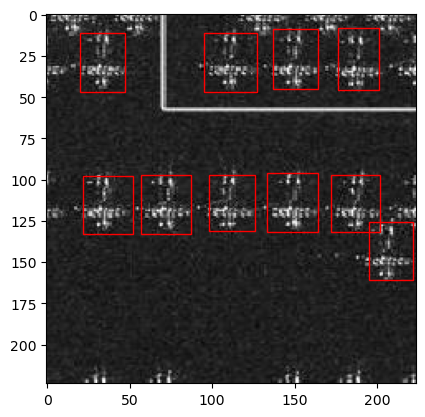

In [40]:
# Plot the first example image from YOLOv9 data
fig, ax = plt.subplots(1)
ax.imshow(image_1)

# Get first example image dimensions
img_height, img_width, _ = image_1.shape

# Plotting bounding boxes overlaying first example image, in accordance with YOLO format
for annotation in annotations_1:
    class_id, x_center, y_center, width, height = annotation

    # Convert from normalized to actual pixel values
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height

    # Calculate the top-left corner of the bounding box for purposes of using patches.Rectangle
    x_min = x_center - (width / 2)
    y_min = y_center - (height / 2)

    # Draw bounding box
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.show()

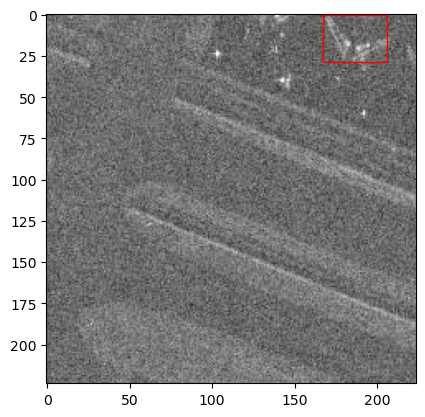

In [41]:
# Plot the second example image from YOLOv9 data
fig, ax = plt.subplots(1)
ax.imshow(image_2)

# Get second example image dimensions
img_height, img_width, _ = image_2.shape

# Plotting bounding boxes overlaying second example image, in accordance with YOLO format
for annotation in annotations_2:
    class_id, x_center, y_center, width, height = annotation

    # Convert from normalized to actual pixel values
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height

    # Calculate the top-left corner of the bounding box for purposes of using patches.Rectangle
    x_min = x_center - (width / 2)
    y_min = y_center - (height / 2)

    # Draw bounding box
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.show()

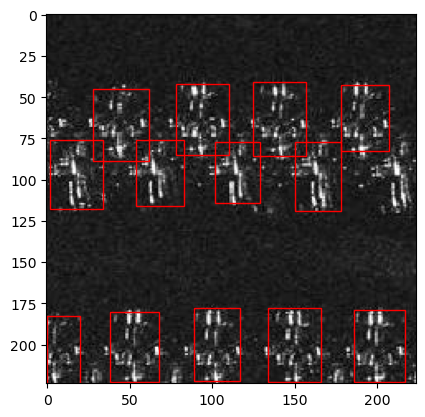

In [42]:
# Drawing bounding boxes in first random example image from JSON data (assumption that image IDs within JSON data would align with the numerical
# ordering of file prefixes, which ended up not being true; the following two examples are different than the preceding YOLO examples)
bboxes = []
for i in range(len(image_annotations_JSON)):
    if image_annotations_JSON[i]['image_id'] == idx_ex1:
        bboxes.append(image_annotations_JSON[i]['bbox'])

img_path = os.path.join(train_images_COCOJSON_path, image_info_JSON[idx_ex1]['file_name'])
fig, ax = plt.subplots()

for i in range(len(bboxes)):
    with Image.open(img_path) as img:
        ax.imshow(img)
        airplane_bbox = patches.Rectangle((bboxes[i][0], bboxes[i][1]), bboxes[i][2], bboxes[i][3],
                                       linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(airplane_bbox)

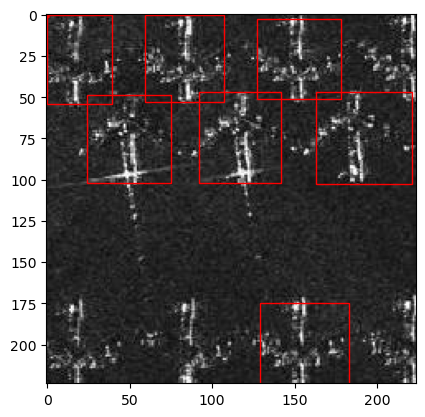

In [43]:
# Drawing bounding boxes in second random example image from JSON data (again the IDs in the JSON data doesn't align with the numerical
# ordering of the filenames)

bboxes = []
for i in range(len(image_annotations_JSON)):
    if image_annotations_JSON[i]['image_id'] == idx_ex2:
        bboxes.append(image_annotations_JSON[i]['bbox'])

img_path = os.path.join(train_images_COCOJSON_path, image_info_JSON[idx_ex2]['file_name'])
fig, ax = plt.subplots()

for i in range(len(bboxes)):
    with Image.open(img_path) as img:
        ax.imshow(img)
        airplane_bbox = patches.Rectangle((bboxes[i][0], bboxes[i][1]), bboxes[i][2], bboxes[i][3],
                                       linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(airplane_bbox)

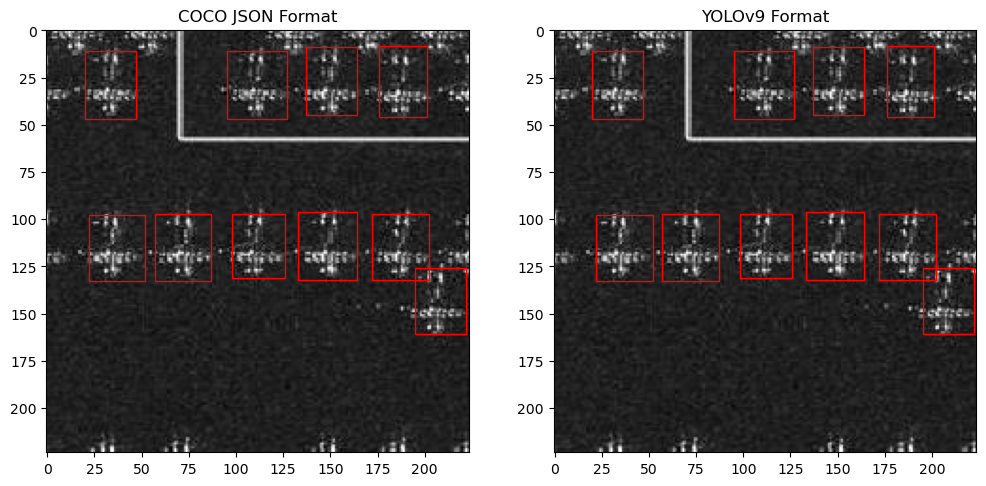

In [44]:
# Now finding the first example image that was used first with the YOLOv9 data from earlier, as the IDs within JSON didn't align with the ordering of the 
# numerical prefixes of the filenames. Comparing the two formats side-by-side.
idx_yolo = 0

for i in range(len(image_info_JSON)):
    if image_info_JSON[i]['file_name'] == os.path.basename(image_YOLOv9_files[idx_ex1]):
        idx_yolo = image_info_JSON[i]['id'];


bboxes = []
for i in range(len(image_annotations_JSON)):
    if image_annotations_JSON[i]['image_id'] == idx_yolo:
        bboxes.append(image_annotations_JSON[i]['bbox'])

img_path = os.path.join(train_images_COCOJSON_path, image_info_JSON[idx_yolo]['file_name'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for i in range(len(bboxes)):
    with Image.open(img_path) as img:
        ax1.imshow(img)
        airplane_bbox = patches.Rectangle((bboxes[i][0], bboxes[i][1]), bboxes[i][2], bboxes[i][3],
                                       linewidth=1, edgecolor='r', facecolor='none')
        ax1.add_patch(airplane_bbox)
ax1.set_title('COCO JSON Format')

# Now plotting 
ax2.imshow(image_1)
ax2.set_title('YOLOv9 Format')

# Get first example image dimensions
img_height, img_width, _ = image_1.shape

# Plotting bounding boxes overlaying first example image, in accordance with YOLO format
for annotation in annotations_1:
    class_id, x_center, y_center, width, height = annotation

    # Convert from normalized to actual pixel values
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height

    # Calculate the top-left corner of the bounding box for purposes of using patches.Rectangle
    x_min = x_center - (width / 2)
    y_min = y_center - (height / 2)

    # Draw bounding box
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')
    ax2.add_patch(rect)
plt.show()